# Data preparation

In [12]:
with open('names.txt', 'r') as f:
    words = f.read().split('\n')
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [13]:
len(words)

32033

##### exploring data

In [14]:
import pandas as pd

# Example DataFrame
data = {'words': words}
df = pd.DataFrame(data)

# Get the counts of each unique word
word_counts = df['words'].value_counts()

print(word_counts)

df['words'].unique


words
emma         2
weslee       2
zailyn       2
meritt       2
jayce        2
            ..
josseline    1
joory        1
jolin        1
joliet       1
zzyzx        1
Name: count, Length: 29494, dtype: int64


<bound method Series.unique of 0            emma
1          olivia
2             ava
3        isabella
4          sophia
           ...   
32028       zylas
32029       zyran
32030       zyrie
32031       zyron
32032       zzyzx
Name: words, Length: 32033, dtype: object>

##

# Approach #1: Count approach

In [15]:
len(words)

32033

In [16]:
# shortest word

min( len(_) for _ in words)


2

In [17]:
min_length=len(words[0]); smallest_name_idx =0
for i,w in enumerate(words):
    current_length = len(w)
    if current_length <min_length:
        min_length = current_length
        smallest_name_idx = i



min_length, words[smallest_name_idx]
            

(2, 'an')

In [18]:
min(words, key=len), max(words, key=len)

('an', 'muhammadibrahim')

In [19]:
# SLIDING WINDOW
# iteate with two character at one  # no stopping confition is needed



b = {}# dict to mantain count of bigram
for w in words:         # emma
    chs = ['<S>'] + list(w) +['<E>']  # ['<S>', 'e', 'm', 'm', 'a', '<E>'] 
    # print(chs)
    for ch1, ch2 in zip(chs, chs[1:]):
        # print(ch1, ch2)
        # ['<S>', 'e'] : bigram of start character  # ['a', '<E>'] : bigram of end
        # calculting frequency of these characters

        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0)+1
        # b[bigram]=  b[bigram] +1 if bigram in b.keys() else 1
        # print(bigram)
b

{('<S>', 'e'): 1531,
 ('e', 'm'): 769,
 ('m', 'm'): 168,
 ('m', 'a'): 2590,
 ('a', '<E>'): 6640,
 ('<S>', 'o'): 394,
 ('o', 'l'): 619,
 ('l', 'i'): 2480,
 ('i', 'v'): 269,
 ('v', 'i'): 911,
 ('i', 'a'): 2445,
 ('<S>', 'a'): 4410,
 ('a', 'v'): 834,
 ('v', 'a'): 642,
 ('<S>', 'i'): 591,
 ('i', 's'): 1316,
 ('s', 'a'): 1201,
 ('a', 'b'): 541,
 ('b', 'e'): 655,
 ('e', 'l'): 3248,
 ('l', 'l'): 1345,
 ('l', 'a'): 2623,
 ('<S>', 's'): 2055,
 ('s', 'o'): 531,
 ('o', 'p'): 95,
 ('p', 'h'): 204,
 ('h', 'i'): 729,
 ('<S>', 'c'): 1542,
 ('c', 'h'): 664,
 ('h', 'a'): 2244,
 ('a', 'r'): 3264,
 ('r', 'l'): 413,
 ('l', 'o'): 692,
 ('o', 't'): 118,
 ('t', 't'): 374,
 ('t', 'e'): 716,
 ('e', '<E>'): 3983,
 ('<S>', 'm'): 2538,
 ('m', 'i'): 1256,
 ('a', 'm'): 1634,
 ('m', 'e'): 818,
 ('<S>', 'h'): 874,
 ('r', 'p'): 14,
 ('p', 'e'): 197,
 ('e', 'r'): 1958,
 ('r', '<E>'): 1377,
 ('e', 'v'): 463,
 ('v', 'e'): 568,
 ('l', 'y'): 1588,
 ('y', 'n'): 1826,
 ('n', '<E>'): 6763,
 ('b', 'i'): 217,
 ('i', 'g'): 428,


In [20]:
b.items()

dict_items([(('<S>', 'e'), 1531), (('e', 'm'), 769), (('m', 'm'), 168), (('m', 'a'), 2590), (('a', '<E>'), 6640), (('<S>', 'o'), 394), (('o', 'l'), 619), (('l', 'i'), 2480), (('i', 'v'), 269), (('v', 'i'), 911), (('i', 'a'), 2445), (('<S>', 'a'), 4410), (('a', 'v'), 834), (('v', 'a'), 642), (('<S>', 'i'), 591), (('i', 's'), 1316), (('s', 'a'), 1201), (('a', 'b'), 541), (('b', 'e'), 655), (('e', 'l'), 3248), (('l', 'l'), 1345), (('l', 'a'), 2623), (('<S>', 's'), 2055), (('s', 'o'), 531), (('o', 'p'), 95), (('p', 'h'), 204), (('h', 'i'), 729), (('<S>', 'c'), 1542), (('c', 'h'), 664), (('h', 'a'), 2244), (('a', 'r'), 3264), (('r', 'l'), 413), (('l', 'o'), 692), (('o', 't'), 118), (('t', 't'), 374), (('t', 'e'), 716), (('e', '<E>'), 3983), (('<S>', 'm'), 2538), (('m', 'i'), 1256), (('a', 'm'), 1634), (('m', 'e'), 818), (('<S>', 'h'), 874), (('r', 'p'), 14), (('p', 'e'), 197), (('e', 'r'), 1958), (('r', '<E>'), 1377), (('e', 'v'), 463), (('v', 'e'), 568), (('l', 'y'), 1588), (('y', 'n'), 18

In [21]:
sorted(b.items(), key=lambda kv:kv[1], reverse=True)

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [22]:
# instead of dict we want store info in b to a 2d array, r
# rows = first charcter
# cols = second character
# each entry in this 2d array will tells us odten the second character follows the first character. 

import torch
a = torch.zeros((3,5), dtype=torch.int32)  #26: letters, 1: <S> 1: <E>
a, a.dtype   # single precision floating point numbers: float32 but we want to store count so precision is not needed

(tensor([[0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0]], dtype=torch.int32),
 torch.int32)

In [23]:
a[1,3] =1
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [24]:
a[1][3]+=10
a

tensor([[ 0,  0,  0,  0,  0],
        [ 0,  0,  0, 11,  0],
        [ 0,  0,  0,  0,  0]], dtype=torch.int32)

In [25]:
# instead of dict we want store info in b to a 2d array, r
# rows = first charcter
# cols = second character
# each entry in this 2d array will tells us odten the second character follows the first character. 


concurrency_matrix = torch.zeros((28,28), dtype=torch.int32)  #26: letters, 1: <S> 1: <E>
concurrency_matrix.shape, concurrency_matrix.dtype   # single precision floating point numbers: float32 but we want to store count so precision is not needed

(torch.Size([28, 28]), torch.int32)

In [26]:
# alphabets = [chr(_) for _ in range(ord('a'), ord('z')+1)]
# rows = ['<S>'] + ['<E>'] + alphabets
# print(rows)

In [27]:
sorted(set("".join(words)))

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [28]:
# concurrency_matrix = torch.zeros((28,28), dtype=torch.int32)  #26: letters, 1: <S> 1: <E>
# concurrency_matrix, concurrency_matrix.dtype   # single precision floating point numbers: float32 but we want to store count so precision is not needed

N = torch.zeros((28,28), dtype=torch.int32)  #26: letters, 1: <S> 1: <E>
N, N.dtype   # single precision floating point numbers: float32 but we want to store count so precision is not needed


# alphabets = [chr(_) for _ in range(ord('a'), ord('z')+1)]
alphabets = list(set("".join(words)))

chars = sorted(alphabets) + ['<S>'] + ['<E>'] 
stoi ={ s:i for i , s in enumerate(chars)}
print(len(stoi), stoi)





b = {}# dict to mantain count of bigram
for w in words:         # emma
    chs = ['<S>'] + list(w) +['<E>']  # ['<S>', 'e', 'm', 'm', 'a', '<E>'] 
    # print(chs)
    for ch1, ch2 in zip(chs, chs[1:]):
        # print(ch1, ch2)
        # ['<S>', 'e'] : bigram of start character  # ['a', '<E>'] : bigram of end
        # calculting frequency of these characters

        bigram = (ch1, ch2)
        # b[bigram] = b.get(bigram, 0)+1
        # print(ch1, ch2)
        # print(rows.index(ch1))
        # print(rows.index(ch2))

        # concurrency_matrix[chars.index(ch1), chars.index(ch2)]+=1
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1,ix2] +=1
        # b[bigram]=  b[bigram] +1 if bigram in b.keys() else 1
        # print(bigram)


# concurrency_matrix[chars.index('n'), chars.index('<E>')]

N

28 {'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7, 'i': 8, 'j': 9, 'k': 10, 'l': 11, 'm': 12, 'n': 13, 'o': 14, 'p': 15, 'q': 16, 'r': 17, 's': 18, 't': 19, 'u': 20, 'v': 21, 'w': 22, 'x': 23, 'y': 24, 'z': 25, '<S>': 26, '<E>': 27}


tensor([[ 556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568, 2528,
         1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,  182,
         2050,  435,    0, 6640],
        [ 321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,  103,
            0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,    0,
           83,    0,    0,  114],
        [ 815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,  116,
            0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,    3,
          104,    4,    0,   97],
        [1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,   60,
           30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,    0,
          317,    1,    0,  516],
        [ 679,  121,  153,  384, 1271,   82,  125,  152,  818,   55,  178, 3248,
          769, 2675,  269,   83,   14, 1958,  861,  580,   69,  463,   50,  132,
         1070,  181,    0, 3983],
        [ 242,    0,

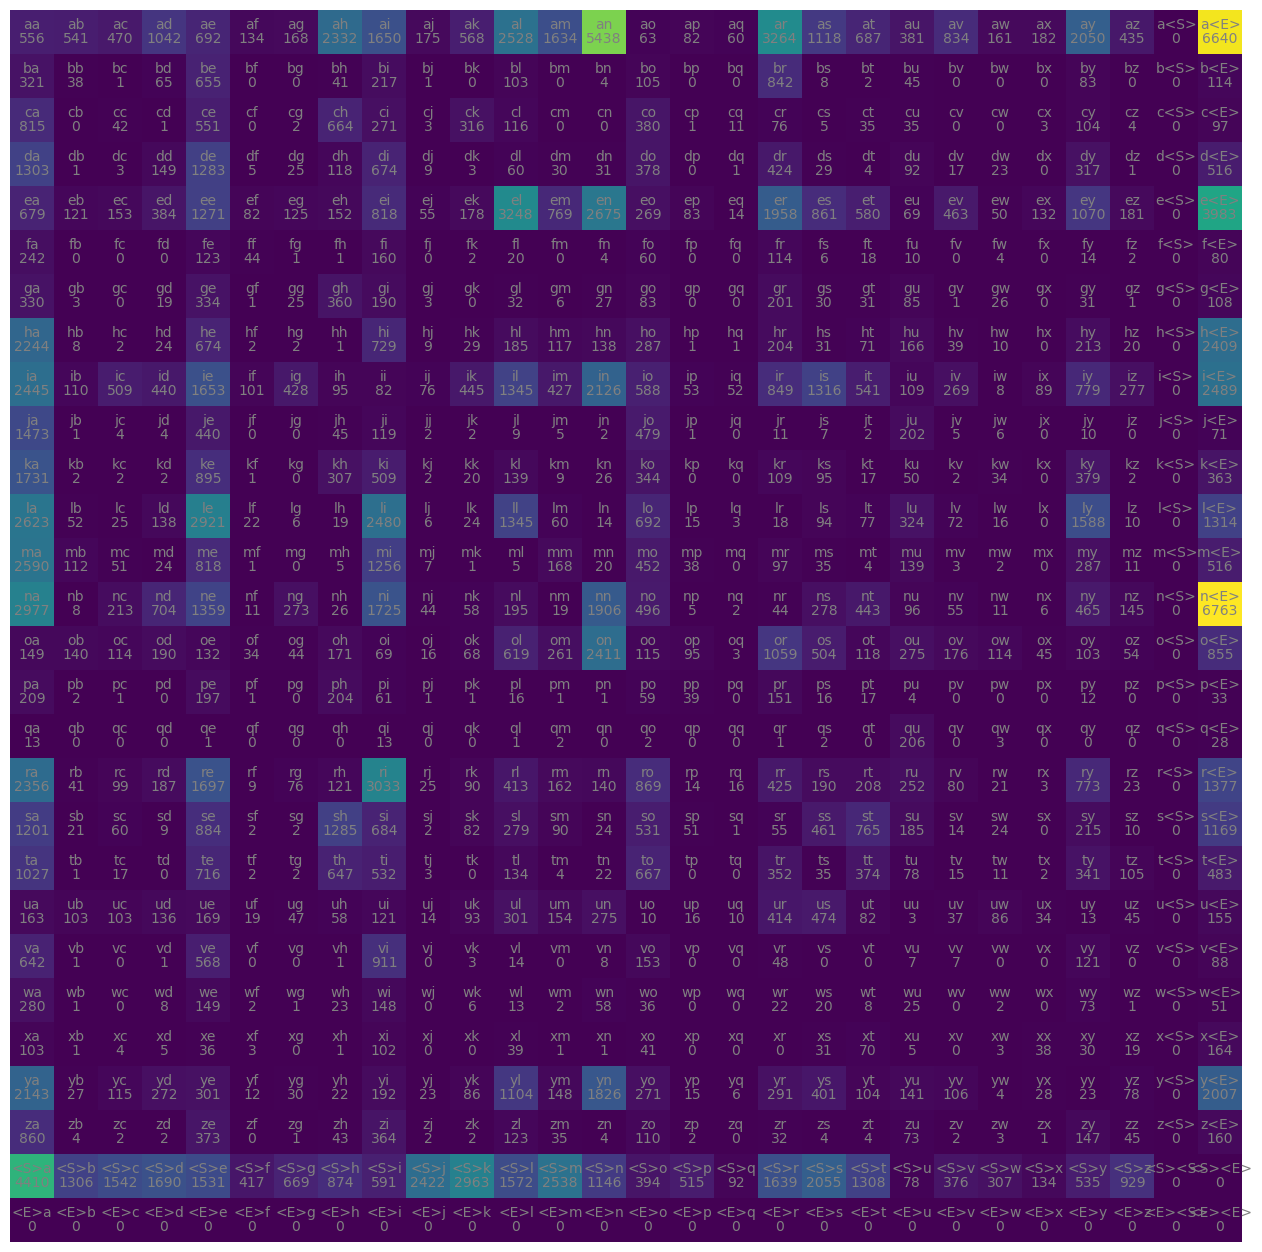

In [29]:

import matplotlib.pyplot as plt
%matplotlib inline


itos = {i:s for s,i in stoi.items()}  #reverse dictionary

plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Blues')
for i in range(28):
    for j in range(28):
        chstr = itos[i]+itos[j]
        plt.text(j,i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j,i, N[i,j].item(), ha="center", va="top", color="gray")
plt.axis('off')
plt.imshow(N)

### reduce special token from 2 to 1

stoi: {'<.>': 0, 'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26}
itos: {0: '<.>', 1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z'}

      first row is count for all first letters i.e. `<.> a`
      first column is count for all last letters i.e.`a<.>`
      
      


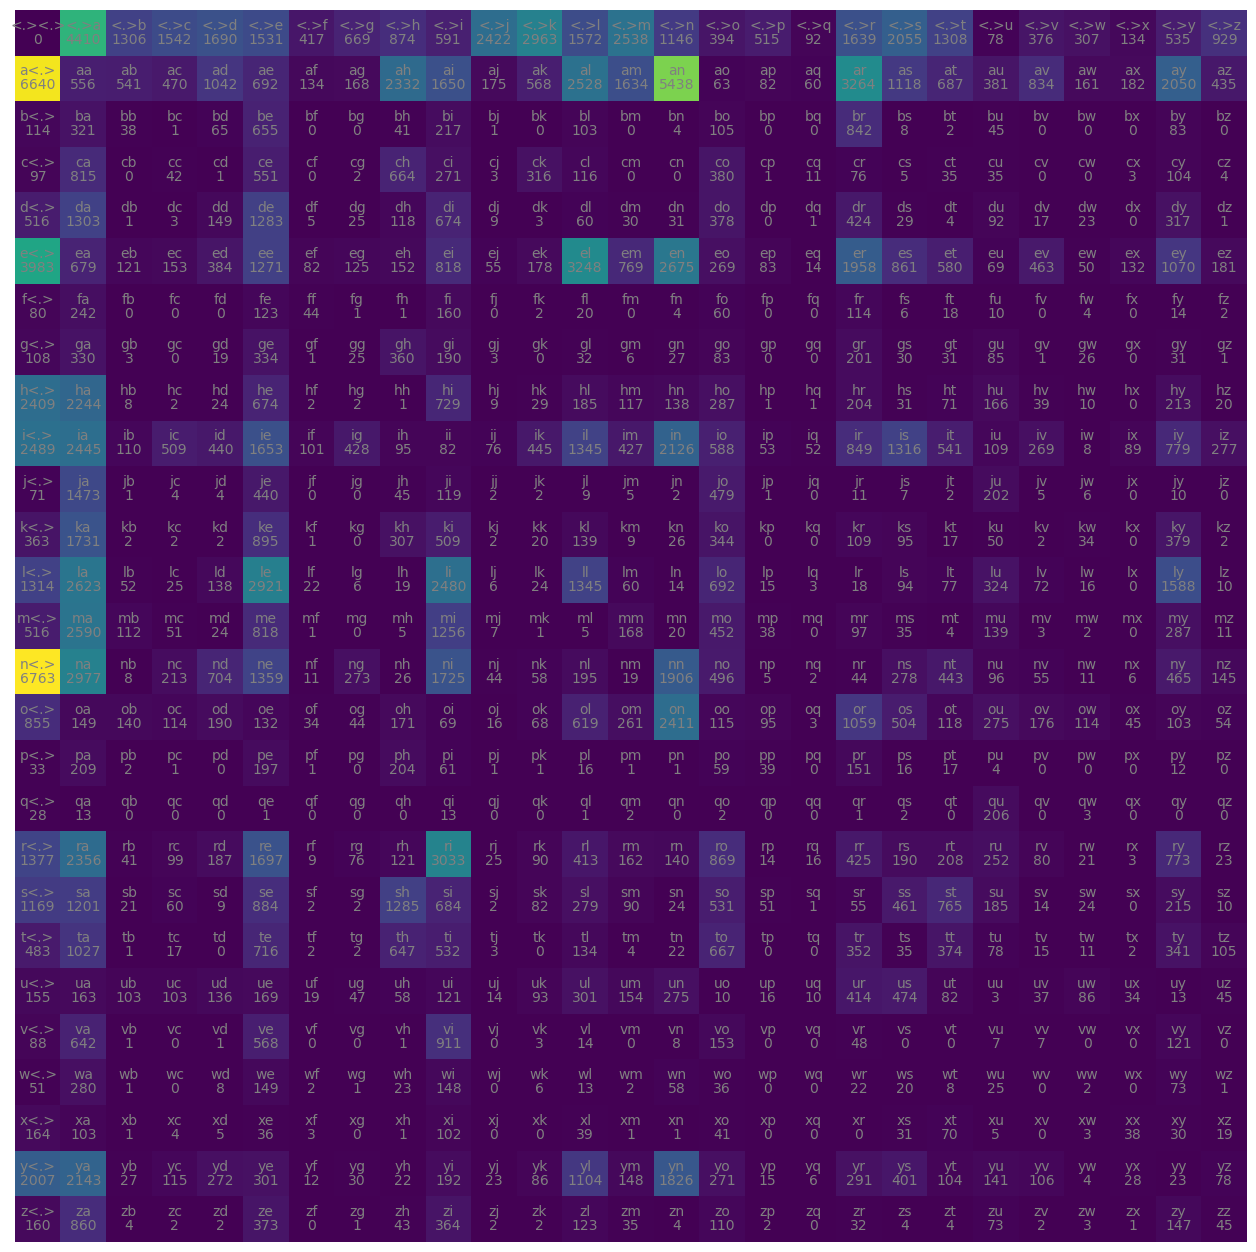

In [30]:
# concurrency_matrix = torch.zeros((28,28), dtype=torch.int32)  #26: letters, 1: <S> 1: <E>
# concurrency_matrix, concurrency_matrix.dtype   # single precision floating point numbers: float32 but we want to store count so precision is not needed

N = torch.zeros((27,27), dtype=torch.int32)  #26: letters, 1: <S> 1: <E>
N, N.dtype   # single precision floating point numbers: float32 but we want to store count so precision is not needed

alphabets = set("".join(words))
chars = ['<.>'] + sorted(alphabets)  # indexes


# alphabets = [chr(_) for _ in range(ord('a'), ord('z')+1)]
# alphabets = list(set("".join(words)))

# chars = ['.'] + sorted(alphabets) 
# chars = ['<.>'] + sorted(alphabets)  # indexes

# chars = sorted(alphabets) 

stoi ={ s:i for i , s in enumerate(chars)}
# stoi['<.>']=0
# print(len(stoi), stoi)
itos={i:s for s, i in stoi.items()}

print(f"stoi: {stoi}")
print(f"itos: {itos}")




b = {}# dict to mantain count of bigram
for w in words:         # emma
    chs = ['<.>'] + list(w) +['<.>']  # ['<S>', 'e', 'm', 'm', 'a', '<E>'] 
    # print(chs)
    for ch1, ch2 in zip(chs, chs[1:]):
        # print(ch1, ch2)
        # ['<S>', 'e'] : bigram of start character  # ['a', '<E>'] : bigram of end
        # calculting frequency of these characters

        # bigram = (ch1, ch2)
        # b[bigram] = b.get(bigram, 0)+1
        # print(ch1, ch2)
        # print(rows.index(ch1))
        # print(rows.index(ch2))

        # concurrency_matrix[chars.index(ch1), chars.index(ch2)]+=1
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1,ix2] +=1
        # b[bigram]=  b[bigram] +1 if bigram in b.keys() else 1
        # print(bigram)


# concurrency_matrix[chars.index('n'), chars.index('<E>')]




import matplotlib.pyplot as plt
%matplotlib inline


itos = {i:s for s,i in stoi.items()}  #reverse dictionary

plt.figure(figsize=(16, 16))
# plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i]+itos[j]
        plt.text(j,i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j,i, N[i,j].item(), ha="center", va="top", color="gray")
plt.axis('off')
plt.imshow(N)




print("""
      first row is count for all first letters i.e. `<.> a`
      first column is count for all last letters i.e.`a<.>`
      
      """)


In [31]:
# first row is all starting values
# first column is all ending values

### converting raw counts into probabilities

In [32]:
N[0, :] # gives raw values of all starting characters  i.e. <s>a

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [33]:
N[0, :].shape

torch.Size([27])

In [34]:
N[: , 0].shape

torch.Size([27])

In [35]:
N[0]/N[0].sum()

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [36]:
print("-----\nwe want to sample from these raw counts but fiest we need to convert them to probabilities.\n----")
p = N[0,:].float()
p /= p.sum()  # NORMALIZING  # so that sum of all probs is equala to 1
p

-----
we want to sample from these raw counts but fiest we need to convert them to probabilities.
----


tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [37]:
p.sum()

tensor(1.)

In [38]:
# generator is being used to make sampling deterministic

g = torch.Generator()
# g.manual_seed(2147483647)
# p = torch.rand(size=(3,), generator=g)
# p/=p.sum() # convert to probs
# p

In [39]:
#  as probs are tensor([0.6064, 0.3033, 0.0903]), we expect first elemnt to be present 60% of times

torch.multinomial(p, num_samples=20, replacement=True, generator=g)  #replacement =True mean we can redraw it after putting back

tensor([ 2, 13,  5, 12, 14, 13,  6, 20, 13, 15, 10,  1,  1, 19, 13, 26,  1,  1,
         4,  1])

In [40]:
# so back to code
#  as probs are tensor([0.6064, 0.3033, 0.0903]), we expect first elemnt to be present 60% of times
#replacement =True mean we can redraw it after putting back
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
ix, itos[ix]

(10, 'j')

In [41]:
g = torch.Generator().manual_seed(2147483647)


for i in range(10):
    ix = 0 # we always begin at index 0
    out = []
    while True:
        # grab row corresponding to ix
        p = N[ix].float()
        p/= p.sum()
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item() # new idx
        out.append(itos[ix])
        if ix ==0:  # ending token
            # meand ix is end token
            break;

    print("".join(out))

junide<.>
janasah<.>
p<.>
cony<.>
a<.>
nn<.>
kohin<.>
tolian<.>
juee<.>
ksahnaauranilevias<.>


## lets try uniform distribution

In [42]:
g = torch.Generator().manual_seed(2147483647)


for i in range(10):
    ix = 0 # we always begin at index 0
    out = []
    while True:
        # trained model
        # grab row corresponding to ix
        p = N[ix].float()
        p/= p.sum()

        # p = torch.ones(27)/27.0 # with trained model-- uniform distribution -- 

        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item() # new idx
        out.append(itos[ix])
        if ix ==0:  # ending token
            # meand ix is end token
            break;

    print("".join(out))

junide<.>
janasah<.>
p<.>
cony<.>
a<.>
nn<.>
kohin<.>
tolian<.>
juee<.>
ksahnaauranilevias<.>


## Make it efficient

### rather than normalizing N[idx], for every iteration, we'll calculate all at once

In [43]:
P = N.float()
print(P.size(), P.sum(dim=1,keepdim=True).shape)
P /= P.sum(dim=1,keepdim=True)  # horizontal sum   # broadcasting ,we gro from right to left;; each dimension has either to be 1 or equal or on eof them doesn't exist
# use inplace opeations , they dont create a copy
P.shape


# in concurrency matrix some along rows and summ along columns dimension is same

torch.Size([27, 27]) torch.Size([27, 1])


torch.Size([27, 27])

In [44]:
P[0].sum()

tensor(1.)

In [45]:
g = torch.Generator().manual_seed(2147483647)


for i in range(5):
    ix = 0 # we always begin at index 0
    out = []
    while True:
        # trained model
        # grab row corresponding to ix
        # p = N[ix].float()
        # p/= p.sum()

        # p = torch.ones(27)/27.0 # with trained model-- uniform distribution -- 
        p=P[ix]

        ix = torch.multinomial(p , num_samples=1, replacement=True, generator=g).item() # new idx  # idx is being taken as probabilities
        out.append(itos[ix])
        if ix ==0:  # ending token
            # meand ix is end token
            break;

    print("".join(out))

junide<.>
janasah<.>
p<.>
cony<.>
a<.>


## Evaluate quality of this model

In [46]:
for w in words[:3]:
    chs = ['<.>']+list(w)+['<.>']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]

        # firsT look at probabiliies that mode assigns to each of these bigrams

        prob = P[ix1, ix2]
        print(f"{ch1}{ch2}: {prob:0.4f}")

<.>e: 0.0478
em: 0.0377
mm: 0.0253
ma: 0.3899
a<.>: 0.1960
<.>o: 0.0123
ol: 0.0780
li: 0.1777
iv: 0.0152
vi: 0.3541
ia: 0.1381
a<.>: 0.1960
<.>a: 0.1377
av: 0.0246
va: 0.2495
a<.>: 0.1960


In [47]:
 # as we have 27 chars, for all chars to be equal likely, each character must have 
1/len(chars) # 4 percent roughly
# for a pefect model we expect these probabilities to be near 1.


0.037037037037037035

### for a pefect model we expect these probabilities to be near 1.

In [48]:

for w in words[:3]:
    chs = ['<.>']+list(w)+['<.>']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]

        # firsT look at probabiliies that mode assigns to each of these bigrams

        prob = P[ix1, ix2]
        print(f"{ch1}{ch2}: {prob:0.4f}")

        

<.>e: 0.0478
em: 0.0377
mm: 0.0253
ma: 0.3899
a<.>: 0.1960
<.>o: 0.0123
ol: 0.0780
li: 0.1777
iv: 0.0152
vi: 0.3541
ia: 0.1381
a<.>: 0.1960
<.>a: 0.1377
av: 0.0246
va: 0.2495
a<.>: 0.1960


Now we need to summarize all these probailities into a single number so that measures quality of this model
 likelihood is the product of all these proabilities so, it is actually telling us about probs of entire dataset assigned by the model to be trained.
 so the product of these probabilities should be as high  as possible. but as all probs show in above are very small number so their product would be very tiny so instead of wokring 
 with numbers directly, we work with log likelihood(log is for scale here)

 
![alt text](log_scale.png)

here, 
    log(probility =1) = 0
    log(probility = 0.001) = -3


    lower the probability, more -ve the number.

    log(abc) = log(a) + log(b) +log(c)

In [49]:


log_likelihood = 0
for w in words[:3]:
    chs = ['<.>']+list(w)+['<.>']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]

        # firsT look at probabiliies that mode assigns to each of these bigrams

        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        print(f"{ch1}{ch2}: prob: {prob:0.4f} ; log_prob: {logprob:0.4f}")
        # lower the probability, more -ve the number

print(f"{log_likelihood = }")

# so if all probs are 1, the likelihood would be zero. mean max value of log_likelihood can be 0, and lower the probabilities, 
# low the log_likelihood will go
# and loss function has semantic that low is good, so we always try to minimze the loss. That's why we'lll invert it, so that'd give use 
# -ve log likelihood

<.>e: prob: 0.0478 ; log_prob: -3.0408
em: prob: 0.0377 ; log_prob: -3.2793
mm: prob: 0.0253 ; log_prob: -3.6772
ma: prob: 0.3899 ; log_prob: -0.9418
a<.>: prob: 0.1960 ; log_prob: -1.6299
<.>o: prob: 0.0123 ; log_prob: -4.3982
ol: prob: 0.0780 ; log_prob: -2.5508
li: prob: 0.1777 ; log_prob: -1.7278
iv: prob: 0.0152 ; log_prob: -4.1867
vi: prob: 0.3541 ; log_prob: -1.0383
ia: prob: 0.1381 ; log_prob: -1.9796
a<.>: prob: 0.1960 ; log_prob: -1.6299
<.>a: prob: 0.1377 ; log_prob: -1.9829
av: prob: 0.0246 ; log_prob: -3.7045
va: prob: 0.2495 ; log_prob: -1.3882
a<.>: prob: 0.1960 ; log_prob: -1.6299
log_likelihood = tensor(-38.7856)


#### -ve log likelihood

In [50]:


log_likelihood = 0
n = 0
for w in words[:3]:
    chs = ['<.>']+list(w)+['<.>']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]

        # firsT look at probabiliies that mode assigns to each of these bigrams

        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n+=1
        print(f"{ch1}{ch2}: prob: {prob:0.4f} ; log_prob: {logprob:0.4f}")
        # lower the probability, more -ve the number

print(f"{log_likelihood = }")

# so if all probs are 1, the likelihood would be zero. mean max value of log_likelihood can be 0, and lower the probabilities, 
# low the log_likelihood will go
# and loss function has semantic that low is good, so we always Gtry to minimze the loss. That's why we'lll invert it, so that'd give use 
# -ve log likelihood

nll = -log_likelihood
print(f"{nll=}")
print(f"normalized/avg nll: {nll/n:.4f}") # this is our loss_fn

<.>e: prob: 0.0478 ; log_prob: -3.0408
em: prob: 0.0377 ; log_prob: -3.2793
mm: prob: 0.0253 ; log_prob: -3.6772
ma: prob: 0.3899 ; log_prob: -0.9418
a<.>: prob: 0.1960 ; log_prob: -1.6299
<.>o: prob: 0.0123 ; log_prob: -4.3982
ol: prob: 0.0780 ; log_prob: -2.5508
li: prob: 0.1777 ; log_prob: -1.7278
iv: prob: 0.0152 ; log_prob: -4.1867
vi: prob: 0.3541 ; log_prob: -1.0383
ia: prob: 0.1381 ; log_prob: -1.9796
a<.>: prob: 0.1960 ; log_prob: -1.6299
<.>a: prob: 0.1377 ; log_prob: -1.9829
av: prob: 0.0246 ; log_prob: -3.7045
va: prob: 0.2495 ; log_prob: -1.3882
a<.>: prob: 0.1960 ; log_prob: -1.6299
log_likelihood = tensor(-38.7856)
nll=tensor(38.7856)
normalized/avg nll: 2.4241



**normalized nll is quality of model.** the higher it is, the worse-off we are. 
Job of our training is to find parameters that minimize `nll loss`

### GOAL: maximize likelihood of the data w.r.t model parameters(statistical modeling)
equivalent to maximizing the log likelihood( because log is monotonic)
equivalent to minimizing -ve log_likelihood
equavalent to minimizing avg nll


so, in advanced exmplaes, cponcucurrency matrix will be calculated by NN and we'll be tuning model parameters to maximize log_likelihood by miniminzg avg nll

In [51]:


# evaluatign probs for one word.
log_likelihood = 0
n = 0
for w in ["zohaibq"]:
    chs = ['<.>']+list(w)+['<.>']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]

        # firsT look at probabiliies that mode assigns to each of these bigrams

        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n+=1
        print(f"{ch1}{ch2}: prob: {prob:0.4f} ; log_prob: {logprob:0.4f}")
        # lower the probability, more -ve the number

print(f"{log_likelihood = }")

# so if all probs are 1, the likelihood would be zero. mean max value of log_likelihood can be 0, and lower the probabilities, 
# low the log_likelihood will go
# and loss function has semantic that low is good, so we always Gtry to minimze the loss. That's why we'lll invert it, so that'd give use 
# -ve log likelihood

nll = -log_likelihood
print(f"{nll=}")
print(f"normalized/avg nll: {nll/n:.4f}") # this is our loss_fn

<.>z: prob: 0.0290 ; log_prob: -3.5404
zo: prob: 0.0459 ; log_prob: -3.0819
oh: prob: 0.0216 ; log_prob: -3.8372
ha: prob: 0.2946 ; log_prob: -1.2220
ai: prob: 0.0487 ; log_prob: -3.0222
ib: prob: 0.0062 ; log_prob: -5.0809
bq: prob: 0.0000 ; log_prob: -inf
q<.>: prob: 0.1029 ; log_prob: -2.2736
log_likelihood = tensor(-inf)
nll=tensor(inf)
normalized/avg nll: inf


 **for bq's count is zero, log 0 is -inf, so it will make whole naormalized nll inf.**
 **as solution we'll do model smooething.we'll add some fake counts i.e. adding count of 1 to everything.**
 the more you add, more smoother model you'll get. less you add more peaked model you'll have

In [52]:
P = (N+1).float()
P/= P.sum(1, keepdim=True)




g = torch.Generator().manual_seed(2147483647)


for i in range(5):
    ix = 0 # we always begin at index 0
    out = []
    while True:
        # trained model
        # grab row corresponding to ix
        # p = N[ix].float()
        # p/= p.sum()

        # p = torch.ones(27)/27.0 # with trained model-- uniform distribution -- 
        p=P[ix]

        ix = torch.multinomial(p , num_samples=1, replacement=True, generator=g).item() # new idx  # idx is being taken as probabilities
        out.append(itos[ix])
        if ix ==0:  # ending token
            # meand ix is end token
            break;

    print("".join(out))





log_likelihood = 0
n = 0
for w in words[:3]:
    chs = ['<.>']+list(w)+['<.>']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]

        # firsT look at probabiliies that mode assigns to each of these bigrams

        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n+=1
        print(f"{ch1}{ch2}: prob: {prob:0.4f} ; log_prob: {logprob:0.4f}")
        # lower the probability, more -ve the number

print(f"{log_likelihood = }")

# so if all probs are 1, the likelihood would be zero. mean max value of log_likelihood can be 0, and lower the probabilities, 
# low the log_likelihood will go
# and loss function has semantic that low is good, so we always Gtry to minimze the loss. That's why we'lll invert it, so that'd give use 
# -ve log likelihood

nll = -log_likelihood
print(f"{nll=}")
print(f"normalized/avg nll: {nll/n:.4f}") # this is our loss_fn





junide<.>
janasah<.>
p<.>
cony<.>
a<.>
<.>e: prob: 0.0478 ; log_prob: -3.0410
em: prob: 0.0377 ; log_prob: -3.2793
mm: prob: 0.0253 ; log_prob: -3.6753
ma: prob: 0.3885 ; log_prob: -0.9454
a<.>: prob: 0.1958 ; log_prob: -1.6305
<.>o: prob: 0.0123 ; log_prob: -4.3965
ol: prob: 0.0779 ; log_prob: -2.5526
li: prob: 0.1774 ; log_prob: -1.7293
iv: prob: 0.0152 ; log_prob: -4.1845
vi: prob: 0.3508 ; log_prob: -1.0476
ia: prob: 0.1380 ; log_prob: -1.9807
a<.>: prob: 0.1958 ; log_prob: -1.6305
<.>a: prob: 0.1376 ; log_prob: -1.9835
av: prob: 0.0246 ; log_prob: -3.7041
va: prob: 0.2473 ; log_prob: -1.3971
a<.>: prob: 0.1958 ; log_prob: -1.6305
log_likelihood = tensor(-38.8086)
nll=tensor(38.8086)
normalized/avg nll: 2.4255


In [53]:



# evaluatign probs for one word.
log_likelihood = 0
n = 0
for w in ["zohaibq"]:
    chs = ['<.>']+list(w)+['<.>']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]

        # firsT look at probabiliies that mode assigns to each of these bigrams

        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n+=1
        print(f"{ch1}{ch2}: prob: {prob:0.4f} ; log_prob: {logprob:0.4f}")
        # lower the probability, more -ve the number

print(f"{log_likelihood = }")

# so if all probs are 1, the likelihood would be zero. mean max value of log_likelihood can be 0, and lower the probabilities, 
# low the log_likelihood will go
# and loss function has semantic that low is good, so we always Gtry to minimze the loss. That's why we'lll invert it, so that'd give use 
# -ve log likelihood

nll = -log_likelihood
print(f"{nll=}")
print(f"normalized/avg nll: {nll/n:.4f}") # this is our loss_fn


<.>z: prob: 0.0290 ; log_prob: -3.5402
zo: prob: 0.0458 ; log_prob: -3.0841
oh: prob: 0.0216 ; log_prob: -3.8348
ha: prob: 0.2937 ; log_prob: -1.2251
ai: prob: 0.0487 ; log_prob: -3.0224
ib: prob: 0.0063 ; log_prob: -5.0734
bq: prob: 0.0004 ; log_prob: -7.8906
q<.>: prob: 0.0970 ; log_prob: -2.3331
log_likelihood = tensor(-30.0036)
nll=tensor(30.0036)
normalized/avg nll: 3.7505


### no more infinite loss

## extra notes

In [54]:
f'{words = }'

"words = ['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia', 'harper', 'evelyn', 'abigail', 'emily', 'elizabeth', 'mila', 'ella', 'avery', 'sofia', 'camila', 'aria', 'scarlett', 'victoria', 'madison', 'luna', 'grace', 'chloe', 'penelope', 'layla', 'riley', 'zoey', 'nora', 'lily', 'eleanor', 'hannah', 'lillian', 'addison', 'aubrey', 'ellie', 'stella', 'natalie', 'zoe', 'leah', 'hazel', 'violet', 'aurora', 'savannah', 'audrey', 'brooklyn', 'bella', 'claire', 'skylar', 'lucy', 'paisley', 'everly', 'anna', 'caroline', 'nova', 'genesis', 'emilia', 'kennedy', 'samantha', 'maya', 'willow', 'kinsley', 'naomi', 'aaliyah', 'elena', 'sarah', 'ariana', 'allison', 'gabriella', 'alice', 'madelyn', 'cora', 'ruby', 'eva', 'serenity', 'autumn', 'adeline', 'hailey', 'gianna', 'valentina', 'isla', 'eliana', 'quinn', 'nevaeh', 'ivy', 'sadie', 'piper', 'lydia', 'alexa', 'josephine', 'emery', 'julia', 'delilah', 'arianna', 'vivian', 'kaylee', 'sophie', 'brielle', 'madeline', 'peyto

This passage provides a concise explanation of the concept of **maximum likelihood estimation (MLE)** in statistics. Let me break it down for you:

### Key Concepts

1. **Observations and Joint Probability Distribution:**
   - You have a set of observations or data points. These observations are assumed to come from some joint probability distribution. However, this distribution is not fully known; it is described in terms of a set of unknown parameters.

2. **Parameters (θ):**
   - The unknown parameters that define the joint distribution are represented by a vector \( \theta = [\theta_1, \theta_2, \dots, \theta_k]^T \). Each \( \theta_i \) is a parameter of the distribution, and together they belong to the parameter space \( \Theta \), which is a subset of Euclidean space (meaning it's a set of possible parameter values).

3. **Parametric Family of Distributions:**
   - The joint probability distribution is part of a parametric family of distributions, denoted as \( \{ f(\cdot; \theta) \mid \theta \in \Theta \} \). This notation means that for each value of \( \theta \) in the parameter space \( \Theta \), there is a corresponding probability distribution function \( f(\cdot; \theta) \).

4. **Likelihood Function \( L_n(\theta) \):**
   - The likelihood function \( L_n(\theta) \) is derived by evaluating the joint probability density function at the observed data sample \( \mathbf{y} = (y_1, y_2, \dots, y_n) \). It is expressed as:
     \[
     L_n(\theta) = L_n(\theta; \mathbf{y}) = f_n(\mathbf{y}; \theta)
     \]
   - Here, \( L_n(\theta) \) is a real-valued function that represents how "likely" the observed data is, given a specific value of the parameter vector \( \theta \).

### Goal of Maximum Likelihood Estimation (MLE)
- **Objective:** The goal of MLE is to find the parameter vector \( \theta \) that maximizes the likelihood function \( L_n(\theta) \). This means finding the set of parameters for which the observed data \( \mathbf{y} \) is most probable.

### Summary
In simple terms, MLE is a method used to estimate the parameters of a probability distribution. You start with some observed data and assume it comes from a distribution defined by unknown parameters. MLE helps you find the parameter values that make the observed data most likely under that distribution.

In the context of maximum likelihood estimation (MLE), the data samples and the parameters indeed play different roles, but they are closely related. Let's clarify the relationship using your example where `x` represents data samples and the parameters could be thought of as weights associated with the data.

### Understanding Data Samples and Parameters

1. **Data Samples (e.g., `x`)**:
   - These are the observed values or measurements that you have collected. For example, in a dataset, `x` could represent individual data points such as features of a dataset.
   - The data samples are fixed once they are observed, and you use them to estimate the unknown parameters of the distribution.

2. **Parameters (e.g., `θ`, which might include weights)**:
   - Parameters define the underlying probability distribution or model that you believe generated the data. These could include things like the mean and variance in a Gaussian distribution, or weights in a linear model.
   - In a linear regression model, for example, the parameters are the weights \( \theta \) associated with each feature of your data samples \( x \).

### Relationship Between Data Samples and Parameters

- **Data Example (`x`)**: 
  - Represents the observed values in your dataset.
  - In a supervised learning context, `x` could be the input features, and `y` could be the output or label associated with each `x`.

- **Parameters (e.g., weights `θ`)**:
  - These are the unknown values that define how the data samples relate to the output (or how they are distributed).
  - For instance, in a linear regression model, the goal is to find the parameters \( \theta \) (the weights) that best predict the output \( y \) from the input \( x \).

### MLE in This Context

- In the MLE framework, you are trying to find the parameters (weights, \( \theta \)) that maximize the likelihood of observing your data \( x \).

- **Example in Linear Regression**:
  - Suppose you have a model: \( y = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_k x_k + \epsilon \), where `y` is the dependent variable, `x_i` are the independent variables, and \( \epsilon \) is the error term.
  - The likelihood function would express the probability of observing the actual data given these parameters \( \theta \).
  - MLE helps you find the set of parameters \( \theta \) that make the observed data (the actual values of `x` and `y`) most probable.

### Summary

- **Data samples** (`x`) are the observed values that you have.
- **Parameters** (e.g., weights `θ`) are the unknown values that define the relationship between your data and the model.
- MLE finds the parameter values that maximize the likelihood of your observed data, making it the most probable under the assumed model. 

So, in MLE, you're adjusting the parameters (like weights) to fit your model to the data as closely as possible by maximizing the likelihood function.

In [55]:
#  as probs are tensor([0.6064, 0.3033, 0.0903]), we expect first elemnt to be present 60% of times

torch.multinomial(p, num_samples=20, replacement=True, generator=g)  #replacement =True mean we can redraw it after putting back

tensor([25, 14, 20, 18, 25, 13,  8, 19,  0, 13, 18, 10, 14, 18,  0,  9, 18,  0,
         8,  0])

In [56]:
# torch.multinomial(p, num_samples=3, replacement=False, generator=g)  #replacement =True mean we can redraw it after putting back

In [57]:
torch.multinomial(p, num_samples=20, replacement=True, generator=g)  #replacement =True mean we can redraw it after putting back

tensor([ 0, 14, 13, 14, 25, 12, 18, 26,  0, 18, 14,  9,  0, 18,  0,  2, 18,  9,
        14,  4])

In [58]:
x = torch.tensor([1,2,3,4,5,6,7])
x.sum()

tensor(28)

In [59]:
y = x/x.sum()
y

tensor([0.0357, 0.0714, 0.1071, 0.1429, 0.1786, 0.2143, 0.2500])

In [60]:
y.sum()

tensor(1.0000)

In [61]:
# now we'll be sampling from this distribution


In [62]:
weights = torch.tensor([0., 0.6, 0.1, 0.3], dtype=torch.float)  # Create a tensor of weights
sampled_indices = torch.multinomial(weights, 4)
print(sampled_indices)

tensor([1, 3, 2, 0])


In [63]:
xstoi ={ s:i for i , s in enumerate(chars)}
xstoi

{'<.>': 0,
 'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

In [64]:
words

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn',
 'abigail',
 'emily',
 'elizabeth',
 'mila',
 'ella',
 'avery',
 'sofia',
 'camila',
 'aria',
 'scarlett',
 'victoria',
 'madison',
 'luna',
 'grace',
 'chloe',
 'penelope',
 'layla',
 'riley',
 'zoey',
 'nora',
 'lily',
 'eleanor',
 'hannah',
 'lillian',
 'addison',
 'aubrey',
 'ellie',
 'stella',
 'natalie',
 'zoe',
 'leah',
 'hazel',
 'violet',
 'aurora',
 'savannah',
 'audrey',
 'brooklyn',
 'bella',
 'claire',
 'skylar',
 'lucy',
 'paisley',
 'everly',
 'anna',
 'caroline',
 'nova',
 'genesis',
 'emilia',
 'kennedy',
 'samantha',
 'maya',
 'willow',
 'kinsley',
 'naomi',
 'aaliyah',
 'elena',
 'sarah',
 'ariana',
 'allison',
 'gabriella',
 'alice',
 'madelyn',
 'cora',
 'ruby',
 'eva',
 'serenity',
 'autumn',
 'adeline',
 'hailey',
 'gianna',
 'valentina',
 'isla',
 'eliana',
 'quinn',
 'nevaeh',
 'ivy',
 'sadie',
 'piper',
 'lydia',
 'alexa',
 'josephine',
 'emery',
 'julia'

In [65]:
x = set("".join(words))
x

{'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z'}

In [66]:
x = list(x)

In [67]:
for i in zip(x, x[1:], x[2:]):
    print(i)

('d', 'y', 'w')
('y', 'w', 'n')
('w', 'n', 'c')
('n', 'c', 'k')
('c', 'k', 't')
('k', 't', 'm')
('t', 'm', 'h')
('m', 'h', 's')
('h', 's', 'l')
('s', 'l', 'a')
('l', 'a', 'r')
('a', 'r', 'e')
('r', 'e', 'o')
('e', 'o', 'i')
('o', 'i', 'q')
('i', 'q', 'f')
('q', 'f', 'u')
('f', 'u', 'b')
('u', 'b', 'z')
('b', 'z', 'x')
('z', 'x', 'v')
('x', 'v', 'p')
('v', 'p', 'g')
('p', 'g', 'j')


In [68]:
alphas = [ chr(i) for i in range(ord('a'), ord('z'))]

In [69]:
xitos = { i:char for i, char in enumerate(alphas)}
xitos

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'j',
 10: 'k',
 11: 'l',
 12: 'm',
 13: 'n',
 14: 'o',
 15: 'p',
 16: 'q',
 17: 'r',
 18: 's',
 19: 't',
 20: 'u',
 21: 'v',
 22: 'w',
 23: 'x',
 24: 'y'}

In [70]:
stoi = { v:i for i,v in itos.items()}
stoi

{'<.>': 0,
 'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

# Approach #2: NN approach

**our nn will take in a single character and predict probability of next character in sequence.
It will make guesses about what character is more likely to follow the input character.
In addition to that we wll be able to evaluate any setting of the parameters of nn because we have a loss function.
so, we'll be going to take a look at this probability distribition and we are going use labels which are essntailly just identity of next/second character in the bigram.
So, knowing what second chaeacter comes next in bigram, allows to look at how high the probability nn assigns to that characternf we , offcourse want that probability to be high ; that is another way of saying the loss is low.
So we'll be using gradient based optimization to tune parameters of this nn because we have loss function and we are going to minimize it; so we'll tune the weights that 
nn is correctlyy predicting the possibilities for the next character.**


### 1. create the training set of all the bigrams

In [71]:
# create the training set of bigrams (x,y)
xs, ys= [], []
for w in words[:1]:
    chs = ['<.>'] + list(w) + ['<.>']
    print(chs)
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)        
ys = torch.tensor(ys)        


['<.>', 'e', 'm', 'm', 'a', '<.>']
<.> e
e m
m m
m a
a <.>


In [72]:
xs, [ itos[i.item()] for i in xs]

(tensor([ 0,  5, 13, 13,  1]), ['<.>', 'e', 'm', 'm', 'a'])

In [73]:
ys, [ itos[i.item()] for i in ys]

(tensor([ 5, 13, 13,  1,  0]), ['e', 'm', 'm', 'a', '<.>'])

In [74]:
# for i in xs:
#     print(itos[i])

itos[xs[1].item()]

'e'

###  In nn we have wx+b, so it doesn't make sense to make an input neuron take on an integer values that you feed in and then multiply it with weights.
so a common way of encoding integer values is `one hot encoding`
In one hot encoding, we take an integer like 13 and then we create a character that is all zeroes except for 13th dimension whihch we turn to one.
now we can feed that vector to nn


In [75]:
import torch.nn.functional as F

xenc = F.one_hot(input=xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [76]:
xenc.shape # we have 5 examples of embedding length 27


torch.Size([5, 27])

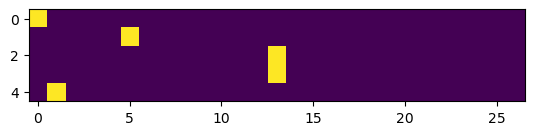

In [77]:
plt.imshow(xenc)

In [78]:
# always be careful with data type; we want dtype to be float numbers

xenc.dtype

torch.float32

### create Neuron WX+B

In [79]:
W = torch.randn((27,1))
W.shape, xenc.shape

(torch.Size([27, 1]), torch.Size([5, 27]))

In [80]:
(xenc @ W).shape

torch.Size([5, 1])

In [81]:
# instead of single neuron we'll be having 27 neurons   
W = torch.randn((27,27))
(xenc@W).shape, W.shape


(torch.Size([5, 27]), torch.Size([27, 27]))

In [82]:
# (5, 27) @ (27, 27) -> (5, 27)
# for every one of 27 neurons we created, what is the firing rate of those neurons on every one of those five examples.

(xenc @ W)[3, 13] # firing rate of 13th neuron for example # 3

# it is being achieved by dot product between example#3 and neuron 13

tensor(0.0870)

In [83]:
xenc[3], W[:, 13], (xenc[3]* W[:, 13]).sum()

(tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 tensor([ 0.3154, -0.9400,  0.1448,  0.3990,  0.1833, -0.0592,  0.2489,  0.3681,
         -1.1668, -0.0685, -0.0114,  0.5298,  0.1200,  0.0870,  1.1306,  0.2575,
          0.0901,  0.2627,  0.1868, -1.5622, -1.2319,  0.0479, -0.8024, -1.6067,
         -1.3243, -0.9400, -1.5337]),
 tensor(0.0870))

### **nonlinearity i.e. acitvation function hasn't being used here.**

**Right now weights are random and a normal distribution of mean:0 and std-dev:1 meaning values are -ve and +ve .. but we want these numbers to represent probabilities. meaning should be between 0 to 1 and their sum is 1. so this just doesn't come out of neural net.
And these can't be counts as values are -ve too. Counts re integers too.
which is really not a good thing to output from nn. 
SO, these 27 numbers are giving us log count.**

So, to get the actual counts, we take the log_counts and we are going exponantiate them.

In [84]:
# so now we'll interprate these numbers as log_counts
(xenc @ W).exp() # so, now we can exponentiate these numbers
# with exponentiation, all -ve numbers have become <1 and all +ve values got bigger i.e. >1
# now we can use these numbers as an alternative to count

tensor([[ 0.8173,  1.9868,  0.5054,  1.6966,  1.7937,  3.7724,  2.0309,  0.1366,
          0.4460,  0.3297,  0.3232,  1.3688,  0.4205,  1.3708,  0.7361,  3.0917,
          1.1862,  1.7229,  1.7351,  0.2009,  5.1770,  1.8047, 14.9837,  1.4012,
          0.4262,  6.0331,  0.2635],
        [ 0.5676,  0.5387,  0.7223,  1.5559,  0.1862,  1.9090,  0.5564,  2.3803,
          1.3978,  6.6097,  0.6284,  1.4857,  0.4880,  0.9425, 27.0944,  2.7617,
          2.7933,  0.5326,  1.6170,  0.7110, 10.4382,  0.8169,  5.7189,  0.8457,
          0.2090,  1.6713,  4.6100],
        [ 3.6054,  0.4808,  0.6699,  0.2867,  5.5345,  0.1868,  2.7129,  0.6821,
          1.4985,  0.9847,  0.4578,  5.0853,  0.4774,  1.0909,  2.6140,  0.7152,
         10.6408,  1.1099,  0.3428,  2.7947,  0.7402,  0.5614,  0.8524,  2.9026,
          1.0545,  0.5459,  0.3482],
        [ 3.6054,  0.4808,  0.6699,  0.2867,  5.5345,  0.1868,  2.7129,  0.6821,
          1.4985,  0.9847,  0.4578,  5.0853,  0.4774,  1.0909,  2.6140,  0.7152

In [85]:
logits = xenc @ W # log_counts
counts =logits.exp() 
counts.shape
# this is equivalent to N matrix we created before.

torch.Size([5, 27])

In [86]:
# probs are just count normalized
probs = counts/counts.sum(1, keepdim=True)
probs[0].sum(), probs.shape

#we fed 5 examples and got (5,27)

# so for example 0 i.e. '<.>e' , so we fed <.> into nn and outcome a disstribution of for probs[0] where each values in those 27 is
#  probability for each of these character to come next after <.>.

# As we'll  tune the W, we 'll get better probability results


(tensor(1.), torch.Size([5, 27]))

In [87]:
probs[0], probs[0].shape

(tensor([0.0147, 0.0356, 0.0091, 0.0304, 0.0322, 0.0677, 0.0364, 0.0025, 0.0080,
         0.0059, 0.0058, 0.0245, 0.0075, 0.0246, 0.0132, 0.0554, 0.0213, 0.0309,
         0.0311, 0.0036, 0.0928, 0.0324, 0.2687, 0.0251, 0.0076, 0.1082, 0.0047]),
 torch.Size([27]))

### summary till now

In [88]:
xs, ys

(tensor([ 0,  5, 13, 13,  1]), tensor([ 5, 13, 13,  1,  0]))

In [89]:
# randomly intialize 27 neurons's weights, each neuron recieves 27 inputs
g= torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g)

In [90]:
xenc = F.one_hot(xs, num_classes=27).float()
logits = xenc @ W  # predicts logits

# this is softmax
counts = logits.exp() # counts , equivalent to N
probs = counts/counts.sum(1, keepdim=True) # probabilities for next character
probs

tensor([[0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
         0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
         0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459],
        [0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
         0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
         0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472],
        [0.0312, 0.0737, 0.0484, 0.0333, 0.0674, 0.0200, 0.0263, 0.0249, 0.1226,
         0.0164, 0.0075, 0.0789, 0.0131, 0.0267, 0.0147, 0.0112, 0.0585, 0.0121,
         0.0650, 0.0058, 0.0208, 0.0078, 0.0133, 0.0203, 0.1204, 0.0469, 0.0126],
        [0.0312, 0.0737, 0.0484, 0.0333, 0.0674, 0.0200, 0.0263, 0.0249, 0.1226,
         0.0164, 0.0075, 0.0789, 0.0131, 0.0267, 0.0147, 0.0112, 0.0585, 0.0121,
         0.0650, 0.0058, 0.0208, 0.0078, 0.0133, 0.0203, 0.1204, 0.0469, 0.0126],
        [0.0150, 0.0086,

## **these last two lines are callled softmax**

In [91]:
nlls = torch.zeros(5)
for i in range(5):
    # ith bigram
    x=xs[i].item() # input chracter index
    # print(x)
    y = ys[i].item() # output charcter index
    print('----------')
    print(f'bigram example {i+1}: {itos[x]}{itos[y]} (index {x}, {y})')
    print(f"input to nn :{x}")
    print(f"output probs from neural net: {probs[i]}")
    print(f"label: {y}")
    p = probs[i,y]
    print(f"probs assigned by nn to the correct character: {p.item()}")
    logp = torch.log(p)
    print(f'log_likeihood: {logp.item()}')
    nll = -logp 
    
    print(f'-ve log_likeihood: {nll.item()}')
    nlls[i] = nll
print('+++++++++++')
print(f"average -ve log likelihood: {nll.mean().item()}")

----------
bigram example 1: <.>e (index 0, 5)
input to nn :0
output probs from neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label: 5
probs assigned by nn to the correct character: 0.01228625513613224
log_likeihood: -4.399273872375488
-ve log_likeihood: 4.399273872375488
----------
bigram example 2: em (index 5, 13)
input to nn :5
output probs from neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label: 13
probs assigned by nn to the correct character: 0.018050700426101685
log_likeihood: -4.014570713043213
-ve log_likeihood: 4.014570713043213
----------
bigram example 3: mm (index 

### OPTIMIZATION ----

In [92]:
xs, ys

(tensor([ 0,  5, 13, 13,  1]), tensor([ 5, 13, 13,  1,  0]))

In [93]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [94]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # one ho encoding: input
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts/counts.sum(1, keepdim=True) #probabilities for next character


#### loss
 **we are not using MSE but -ve log likelihood because we are doing classificaiton, not regression.**

In [95]:
print(probs.shape)
xs, ys

torch.Size([5, 27])


(tensor([ 0,  5, 13, 13,  1]), tensor([ 5, 13, 13,  1,  0]))

In [96]:
# basiaclly we want to pluck out of probs and correct indices here.
# orobs[ example, chracter_id]
probs[0,5], probs[1,13], probs[2, 13], probs[3,1], probs[4,0]
# these are probs we want high


(tensor(0.0123, grad_fn=<SelectBackward0>),
 tensor(0.0181, grad_fn=<SelectBackward0>),
 tensor(0.0267, grad_fn=<SelectBackward0>),
 tensor(0.0737, grad_fn=<SelectBackward0>),
 tensor(0.0150, grad_fn=<SelectBackward0>))

In [97]:
loss = -probs[torch.arange(5), ys].log().mean() # because we loook at log probabilities
loss

tensor(3.7693, grad_fn=<NegBackward0>)

In [98]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # one ho encoding: input
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts/counts.sum(1, keepdim=True) #probabilities for next character
loss = -probs[torch.arange(5), ys].log().mean() # because we loook at log probabilities
# pytorch on ts own, keep tracks of everythin and builds a computational_grapg

In [99]:
print(f"{loss.item()=}")

loss.item()=3.7693049907684326


In [100]:
# backward pass
W.grad =None # torch.zero_grad() # set gradients to zero
loss.backward()

In [101]:
W.grad.shape

torch.Size([27, 27])

In [102]:
# updatin weights
W.data += -0.1 * W.grad

In [110]:
xs.shape

torch.Size([228146])

### so put everything together

In [111]:
# create the training set of bigrams (x,y)
xs, ys= [], []
for w in words:
    chs = ['<.>'] + list(w) + ['<.>']
    # print(chs)
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        # print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)        
ys = torch.tensor(ys)        
num=xs.nelement()
print(f"Number of examples: {num}")
g = torch.Generator().manual_seed(2147483646)
W = torch.randn((27, 27), generator=g, requires_grad=True)  # we 27 character where each character has 27 embedding(one_hot encoding)


Number of examples: 228146


In [104]:
# gradient descent 
for i in range(100):
    # forward pass
    xenc = F.one_hot(xs, num_classes=27).float() # one ho encoding: input
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    probs = counts/counts.sum(1, keepdim=True) #probabilities for next character
    loss = -probs[torch.arange(num), ys].log().mean() # because we loook at log probabilities

    print(f"{loss.item()=}")
    
    
    # backward pass
    W.grad =None # torch.zero_grad() # set gradients to zero
    loss.backward()


    # updatin weights
    W.data += -50 * W.grad

loss.item()=3.7087409496307373
loss.item()=3.3531408309936523
loss.item()=3.1522786617279053
loss.item()=3.0162723064422607
loss.item()=2.9198672771453857
loss.item()=2.847222089767456
loss.item()=2.7911477088928223
loss.item()=2.7473268508911133
loss.item()=2.7127881050109863
loss.item()=2.6853525638580322
loss.item()=2.6633191108703613
loss.item()=2.6453278064727783
loss.item()=2.630336046218872
loss.item()=2.617598533630371
loss.item()=2.606600522994995
loss.item()=2.596982479095459
loss.item()=2.5884852409362793
loss.item()=2.5809133052825928
loss.item()=2.5741171836853027
loss.item()=2.5679802894592285
loss.item()=2.562408447265625
loss.item()=2.5573267936706543
loss.item()=2.552672863006592
loss.item()=2.5483956336975098
loss.item()=2.5444514751434326
loss.item()=2.540804147720337
loss.item()=2.537421703338623
loss.item()=2.5342774391174316
loss.item()=2.5313472747802734
loss.item()=2.5286107063293457
loss.item()=2.526050090789795
loss.item()=2.523649215698242
loss.item()=2.52139

#### ***we expect to achieve initial - log_likelihood that we achieve using concurrency matrix***
#### ***normalized/avg nll: 2.4241***


#### **the way `logits = xenc @ W ` words using one-hot nencoding is that, i.e. if you have one hot encoder with index 5 turn on, multiply that vector with W will end up plucking out the fifth row from W. logits will just become 5 th row of W, that's thway matrix multiplication works**

1. just as happended in bigram earlier implememntation, first character was just a look up in concurrency matrix to get probabiility distribution. using one hot encoding , we are doing same thing. **logits just becomes appropriate row of W, then we just expo those log_counts and normalize it to make probaility(i.e. apply softmanx), so our weightsW is literally trying to becomes that concurrency matric we had in count based approach.**

so goal is  **`W.exp() ~~ concurrency matrix`** where concurrency_matrix was filled in by counting and W is guided by loss using gradient descent to arrive at exact same array



2. So, if we initialize  W to all zeroes-> then logits will become all zero,  then exponentiating the logic will become all 1. and then all probailities will turn out to be uniform exactly like fake adding 1000000+ fake counts to concurrency matrix.. It has exactly same effect as smoothing as we have seen above.

    W=[all zeroes] will give uniform distribution,
so trying to incentivize W to be near Zero, it wil have same effect as label smoothing. The more we incentivize it in loss function, more smooting we are going to achieve i.e. uniform distribution.

so, this brings us to something called **Regularization**
where we can augment the loss function to have, that small function that we can call regularization loss. 

In [105]:
# for regularization we can 
(W**2).sum(),  (W**2).mean() # this will be regularization loss 


(tensor(1261.5767, grad_fn=<SumBackward0>),
 tensor(1.7306, grad_fn=<MeanBackward0>))


 this will try to make all Ws to be zero because If W's are not zero, lyou'll feel a loss
 it is to push W to be 0   

 strength of this isexactly controlling amount of fake_count we add for **label smoothing**
 
 if alpha is too big here, then it will be too smooth, i.e. uniform predictions.

In [106]:
# gradient descent 
for i in range(100):
    # forward pass
    xenc = F.one_hot(xs, num_classes=27).float() # one ho encoding: input
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    probs = counts/counts.sum(1, keepdim=True) #probabilities for next character
    loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean() # because we loook at log probabilities

    print(f"{loss.item()=}")
    
    
    # backward pass
    W.grad =None # torch.zero_grad() # set gradients to zero
    loss.backward()


    # updatin weights
    W.data += -50 * W.grad

loss.item()=2.4909780025482178
loss.item()=2.490812301635742
loss.item()=2.4906516075134277
loss.item()=2.4904961585998535
loss.item()=2.4903440475463867
loss.item()=2.4901959896087646
loss.item()=2.49005126953125
loss.item()=2.4899098873138428
loss.item()=2.4897713661193848
loss.item()=2.489636182785034
loss.item()=2.4895036220550537
loss.item()=2.4893734455108643
loss.item()=2.4892466068267822
loss.item()=2.489121675491333
loss.item()=2.488999843597412
loss.item()=2.488880157470703
loss.item()=2.488762617111206
loss.item()=2.488647699356079
loss.item()=2.488534688949585
loss.item()=2.4884238243103027
loss.item()=2.4883151054382324
loss.item()=2.488208532333374
loss.item()=2.4881036281585693
loss.item()=2.4880011081695557
loss.item()=2.4879000186920166
loss.item()=2.4878013134002686
loss.item()=2.487703561782837
loss.item()=2.4876081943511963
loss.item()=2.4875142574310303
loss.item()=2.487421989440918
loss.item()=2.4873316287994385
loss.item()=2.4872426986694336
loss.item()=2.4871551

### sampling from NN

In [112]:
g= torch.Generator().manual_seed(2147483647)
for i in range(5):
    out = []
    ix=0  # <.>
    while True:



        # traditional
        # p=P[ix]

        ####################### NN
        # first take ix and one-hot encode it
        xenc  = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ W # predict the log counts
        counts = logits.exp()
        p = counts / counts.sum(1, keepdim=True) # probs for next character

        # ------


        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix ==0:
            break;
    print(''.join(out))

buwjdldiqgpzah<.>
p<.>
cfqyoocdza<.>
jvtnwtohcdgs<.>
ghzmuslgnpauyahibembajsdbdaikrwyotavsnzpinvzlaftbzfnvtdmrhyfoetdmjvpofnszfjhruagqrcooe<.>


Let's dive deep into the code you provided, focusing on how the logits are computed, why they represent log-counts, and the entire process of converting them into probabilities and then calculating the loss.

### **Overview of the Code:**
This code snippet is implementing a simple bigram language model using PyTorch. The goal is to predict the next character in a sequence based on the current character using a bigram model. Here's a breakdown:

1. **Creating the Training Set of Bigrams (`xs`, `ys`):**
   - For each word in the list `words`, we prepend and append a special token `'<.>'` to denote the start and end of the word.
   - The loop then creates pairs of consecutive characters (bigrams) from the modified word.
   - For each bigram (e.g., `ch1` followed by `ch2`), it maps the characters to indices using a dictionary `stoi` (which stands for "string to index").
   - `xs` stores the indices of the first character in each bigram, and `ys` stores the indices of the second character.

2. **Initialization:**
   - `W`: A weight matrix of size `(27, 27)` (assuming 27 characters including special tokens) is initialized with random values. This matrix will be optimized during training.

### **Forward Pass:**
Let's break down each part of the forward pass in detail:

1. **One-Hot Encoding:**
   ```python
   xenc = F.one_hot(xs, num_classes=27).float() # one-hot encoding
   ```
   - `xs` is a tensor containing the indices of the first character in each bigram.
   - `F.one_hot(xs, num_classes=27)` converts `xs` into a one-hot encoded tensor. Each row in `xenc` represents a character in the vocabulary, with a `1` at the position corresponding to the character's index and `0` elsewhere.
   - `.float()` converts the one-hot encoded tensor from integer type to floating-point, which is necessary for matrix multiplication.

2. **Logits Computation:**
   ```python
   logits = xenc @ W # predict log-counts
   ```
   - `xenc @ W` performs matrix multiplication between the one-hot encoded input `xenc` and the weight matrix `W`.
   - **Logits Interpretation:** 
     - Each row of `xenc` selects a corresponding row from `W` (because of the nature of matrix multiplication with one-hot vectors).
     - The resulting `logits` are the values from the corresponding row of `W` associated with the current character (the character represented by the one-hot vector).
     - These logits represent the **log-counts** for transitioning from the current character to each possible next character. The reason they are called log-counts is that, in a probabilistic model, the logits often represent the logarithm of unnormalized probabilities (or counts in a count-based model).

3. **Exponentiation of Logits:**
   ```python
   counts = logits.exp() # counts, equivalent to N
   ```
   - `logits.exp()` applies the exponential function to each element of the logits tensor.
   - **Why Exponentiate?**
     - The logits are in log-space (log-counts), and by exponentiating them, we convert these log-counts into regular counts. This is analogous to converting log-probabilities back to regular probabilities.
     - The resulting `counts` represent the unnormalized probabilities or raw scores (which could be thought of as counts) for transitioning to each possible next character.

4. **Normalization to Get Probabilities:**
   ```python
   probs = counts / counts.sum(1, keepdim=True) # probabilities for next character
   ```
   - `counts.sum(1, keepdim=True)` calculates the sum of counts across each row (i.e., for each bigram starting character).
   - Dividing `counts` by this sum normalizes them, converting the counts into probabilities. Each row in `probs` now sums to 1 and represents the probability distribution over possible next characters given the current character.

5. **Loss Computation:**
   ```python
   loss = -probs[torch.arange(num), ys].log().mean() # log probabilities
   ```
   - `probs[torch.arange(num), ys]` extracts the probabilities corresponding to the actual next characters (stored in `ys`).
   - `.log()` takes the logarithm of these probabilities. This is done because the loss being computed is the **negative log-likelihood** of the true next characters.
   - `loss.mean()` computes the mean of the negative log-likelihoods across all examples. This scalar value is the loss that will be minimized during training.

### **Backward Pass and Weight Update:**

1. **Gradient Computation:**
   ```python
   W.grad = None # torch.zero_grad() # set gradients to zero
   loss.backward()
   ```
   - `loss.backward()` computes the gradients of the loss with respect to the weight matrix \( W \). These gradients tell us how to adjust \( W \) to reduce the loss.

2. **Updating Weights:**
   ```python
   W.data += -50 * W.grad
   ```
   - `W.data += -50 * W.grad` updates the weights by subtracting a scaled version of the gradient from the current weights.
   - The learning rate in this case is `50`, which controls the size of the step taken in the direction opposite to the gradient (since we want to minimize the loss).

### **Summary:**
- **Logits as Log-Counts:** The logits computed in the forward pass can be interpreted as log-counts of transitioning from one character to another, similar to how counts are used in a bigram model.
- **Exponentiation and Normalization:** By exponentiating the logits, we convert log-counts into actual counts, which are then normalized to get a probability distribution over the next character.
- **Training Process:** The model is trained to minimize the negative log-likelihood of the true next characters by adjusting the weights in \( W \). Over time, \( W \) should ideally learn to approximate the transition probabilities between characters, similar to a count-based bigram model but optimized using gradient descent.

The sigmoid function is another commonly used activation function in neural networks, especially in binary classification tasks. Let's dive deep into how the sigmoid function operates, particularly in the context of logits and how it handles outputs that may be in log scale.

### The Sigmoid Function

The sigmoid function is defined as:

\[
\sigma(z) = \frac{1}{1 + e^{-z}}
\]

Where \( z \) is the input to the function, often referred to as the logit. The sigmoid function maps any real-valued number into the interval \( (0, 1) \), making it useful for representing probabilities.

### Handling Logits with the Sigmoid Function

1. **Logits and Sigmoid**:
   - In a binary classification scenario, the neural network typically outputs a single logit \( z \), which represents the raw score or activation before applying the sigmoid function.
   - The logit \( z \) can be positive, negative, or zero. The sigmoid function then transforms this logit into a probability value.

   - **Positive Logits**: When \( z \) is positive, \( e^{-z} \) becomes small, making \( \sigma(z) \) approach 1. This corresponds to a high probability for the positive class.
   - **Negative Logits**: When \( z \) is negative, \( e^{-z} \) becomes large, making \( \sigma(z) \) approach 0. This corresponds to a high probability for the negative class.
   - **Zero Logit**: When \( z = 0 \), \( \sigma(z) = 0.5 \), indicating equal probability for both classes.

2. **Interpretation in Logarithmic Space**:
   - The sigmoid function is often used to convert logits into probabilities. If the logits \( z \) are interpreted in log scale (e.g., as log-odds), the sigmoid function can be seen as converting these log-odds back into probabilities.
   - **Log-Odds**: The logit \( z \) can be interpreted as the log-odds of the positive class, where:
   
   \[
   \text{Log-Odds} = \log \left(\frac{P(\text{positive class})}{1 - P(\text{positive class})}\right)
   \]
   
   The sigmoid function converts these log-odds into the actual probability \( P(\text{positive class}) \).

   \[
   P(\text{positive class}) = \frac{1}{1 + e^{-z}}
   \]

3. **Example with PyTorch**:

   Let’s look at an example in PyTorch where we calculate the probability using the sigmoid function for different logits:

   ```python
   import torch
   import torch.nn.functional as F

   # Example logits
   logits = torch.tensor([-2.0, 0.0, 2.0])  # raw outputs from the model

   # Convert logits to probabilities using sigmoid
   probabilities = torch.sigmoid(logits)

   print("Logits:", logits)
   print("Probabilities:", probabilities)
   ```

   Output:

   ```
   Logits: tensor([-2.,  0.,  2.])
   Probabilities: tensor([0.1192, 0.5000, 0.8808])
   ```

   - Here, you can see that a logit of `-2.0` maps to a probability of `0.1192`, a logit of `0.0` maps to `0.5`, and a logit of `2.0` maps to `0.8808`.

### Loss Function: Binary Cross-Entropy

1. **Binary Cross-Entropy Loss**:
   - In binary classification, the binary cross-entropy loss is commonly used, and it operates directly with probabilities. The loss function is defined as:

   \[
   \text{BCE} = -\frac{1}{N} \sum_{i=1}^N \left[ y_i \log(p_i) + (1 - y_i) \log(1 - p_i) \right]
   \]

   Where:
   - \( y_i \) is the true label (0 or 1).
   - \( p_i \) is the predicted probability obtained from the sigmoid function.

2. **Numerical Stability**:
   - When computing the binary cross-entropy loss, it's crucial to handle numerical stability, particularly when the logit values are extremely large (positive or negative). In PyTorch, the `torch.nn.functional.binary_cross_entropy_with_logits` function combines the sigmoid activation and binary cross-entropy loss into a single step to avoid numerical instability.

   Example:

   ```python
   logits = torch.tensor([2.0])
   target = torch.tensor([1.0])  # True label is 1

   # Binary cross-entropy with logits (numerically stable)
   loss = F.binary_cross_entropy_with_logits(logits, target)

   print("Loss:", loss.item())
   ```

### Summary

- The sigmoid function converts logits, which can be interpreted as log-odds, into probabilities ranging from 0 to 1.
- Positive logits produce probabilities closer to 1, indicating a higher likelihood of the positive class, while negative logits produce probabilities closer to 0.
- In binary classification tasks, the binary cross-entropy loss is used, and combining it with the sigmoid function ensures numerical stability when handling logits, especially when they have extreme values.
- The sigmoid function is essential in scenarios where you need to convert log-scale outputs (logits) into interpretable probabilities.

**Log-odds** is a term used in statistics and machine learning to describe the logarithm of the odds of an event occurring. It's a way of expressing probabilities that can be particularly useful in logistic regression and binary classification.

### Understanding Odds

First, let's understand what "odds" are:

- **Odds** represent the ratio of the probability of an event occurring to the probability of it not occurring.
- If \( p \) is the probability of an event occurring, then the odds are calculated as:

  \[
  \text{Odds} = \frac{p}{1 - p}
  \]

  Here:
  - \( p \) is the probability of the event occurring (e.g., the probability of winning a game).
  - \( 1 - p \) is the probability of the event not occurring (e.g., the probability of losing the game).

### Log-Odds (Logit)

The **log-odds** (or **logit**) is simply the natural logarithm of the odds. Mathematically, it's expressed as:

\[
\text{Log-Odds} = \log\left(\frac{p}{1 - p}\right)
\]

- When \( p = 0.5 \), the log-odds is 0 because the odds are 1:1 (even odds).
- If \( p > 0.5 \), the log-odds is positive, indicating that the event is more likely to occur than not.
- If \( p < 0.5 \), the log-odds is negative, indicating that the event is less likely to occur than not.

### Why Use Log-Odds?

1. **Linearity**: Log-odds transform a probability (which is constrained between 0 and 1) into a range that can extend from \(-\infty\) to \(+\infty\). This makes it easier to apply linear models like logistic regression.
  
2. **Interpretability**: The log-odds provide a linear relationship with the predictors in a logistic regression model, making it easier to interpret the effects of predictors on the probability of an event.

### Example

Consider an event with a 75% probability of occurring (\( p = 0.75 \)):

1. **Calculate the odds**:

   \[
   \text{Odds} = \frac{0.75}{1 - 0.75} = \frac{0.75}{0.25} = 3
   \]

   The odds of the event occurring are 3:1.

2. **Calculate the log-odds**:

   \[
   \text{Log-Odds} = \log(3) \approx 1.0986
   \]

   The log-odds of the event occurring are approximately 1.1.

This transformation is particularly important in logistic regression, where the relationship between the input variables (features) and the log-odds of the outcome is modeled. The sigmoid function then transforms the log-odds back into a probability.

The input \( z \) in the sigmoid function can indeed be interpreted as the log-odds of an event. This is a fundamental concept in logistic regression and binary classification.

### Log-Odds Interpretation

The **log-odds** (or logit) is the logarithm of the odds of the probability of an event occurring versus it not occurring. Mathematically, it is expressed as:

\[
z = \log\left(\frac{p}{1-p}\right)
\]

Where:
- \( p \) is the probability of the event occurring (i.e., the positive class).
- \( 1 - p \) is the probability of the event not occurring (i.e., the negative class).

### Sigmoid Function and Log-Odds

The sigmoid function, given by:

\[
\sigma(z) = \frac{1}{1 + e^{-z}}
\]

maps the log-odds \( z \) to a probability \( p \) between 0 and 1.

To see how this works, let's derive the relationship between \( z \) and \( p \):

1. Start with the equation for the sigmoid function:
   
   \[
   p = \frac{1}{1 + e^{-z}}
   \]

2. Rearrange this to express \( p \) in terms of \( z \):

   \[
   1 + e^{-z} = \frac{1}{p}
   \]

   \[
   e^{-z} = \frac{1}{p} - 1
   \]

3. Simplify the expression on the right-hand side:

   \[
   e^{-z} = \frac{1 - p}{p}
   \]

4. Take the natural logarithm of both sides to solve for \( z \):

   \[
   -z = \log\left(\frac{1 - p}{p}\right)
   \]

5. Finally, multiply by \(-1\) to get the log-odds:

   \[
   z = \log\left(\frac{p}{1 - p}\right)
   \]

This shows that the input \( z \) to the sigmoid function is the log-odds of the probability \( p \). 

### Practical Interpretation

- **Positive Log-Odds**: If \( z \) is positive, the odds are in favor of the event occurring, meaning \( p > 0.5 \).
- **Negative Log-Odds**: If \( z \) is negative, the odds are against the event occurring, meaning \( p < 0.5 \).
- **Zero Log-Odds**: If \( z = 0 \), the odds are even, meaning \( p = 0.5 \).

### Example

Suppose you have a logit (log-odds) value \( z = 2 \):

\[
p = \frac{1}{1 + e^{-2}} \approx 0.88
\]

This means the event has an 88% probability of occurring.

Conversely, if \( z = -2 \):

\[
p = \frac{1}{1 + e^{2}} \approx 0.12
\]

This means the event has only a 12% probability of occurring.

### Summary

The logit \( z \) is a transformation of the probability \( p \) that expresses the odds of the event occurring in logarithmic terms. The sigmoid function then maps these log-odds back into a probability, making it a crucial tool in binary classification and logistic regression.

You've asked for an in-depth explanation of the code, particularly focusing on the logits and how they relate to counts and probabilities. Let's break this down step by step:

1. Logits calculation:
   ```python
   xenc = F.one_hot(xs, num_classes=27).float()
   logits = xenc @ W
   ```
   
   Here, `xenc` is a one-hot encoded version of the input characters. When we multiply this with W (`xenc @ W`), we're effectively selecting rows from W corresponding to each input character. The result, `logits`, represents the raw, unnormalized predictions of the model.

   You're correct that the values in W (and thus the logits) are effectively in a log scale. This is because of how we use them in the subsequent steps.

2. From logits to counts:
   ```python
   counts = logits.exp()
   ```
   
   This line is crucial. By applying `exp()` to the logits, we're converting from log space to linear space. If W contained actual log counts, this operation would give us the raw counts.

3. From counts to probabilities:
   ```python
   probs = counts/counts.sum(1, keepdim=True)
   ```
   
   This step normalizes the counts to get probabilities. We divide each count by the sum of counts for that row, ensuring that probabilities for each next character sum to 1.

4. Loss calculation:
   ```python
   loss = -probs[torch.arange(num), ys].log().mean()
   ```
   
   This line is doing several things:
   - `probs[torch.arange(num), ys]` selects the predicted probability for each correct next character.
   - `.log()` takes the log of these probabilities.
   - The negative sign and `.mean()` compute the negative log likelihood loss.

   To answer your specific question: Yes, this loss function is a key reason why W ends up outputting in a log scale. By using log probabilities in the loss, we're incentivizing W to produce values that, when exponentiated and normalized, give good probability estimates.

5. Why log scale?
   Working in log space has several advantages:
   - Numerical stability: It prevents underflow for very small probabilities.
   - Computational efficiency: It turns multiplication into addition.
   - It matches well with the exponential nature of the softmax function used in classification tasks.

6. Training process:
   The gradient descent process (`W.data += -50 * W.grad`) adjusts W to minimize the loss. Over time, W learns to produce logits that, when exponentiated and normalized, closely approximate the true conditional probabilities of the next character given the current character.

In essence, W is learning to approximate the log of the concurrency matrix from the count-based approach, but through gradient descent rather than direct counting. The exp-normalize process (softmax) then converts these learned log counts into probabilities.

This approach allows the model to learn a continuous, differentiable approximation of the discrete counting process, enabling it to generalize better to unseen data and to be optimized using gradient-based methods.

Yes, the expression `-probs[torch.arange(num), ys].log().mean()` is related to why the output of the weight matrix `W` can be interpreted as being in log scale, but there's more to it.

### How `W` Outputs in Log Scale

1. **Logits and Matrix Multiplication:**
   - When you compute `logits = xenc @ W`, the result is directly derived from the entries in the weight matrix `W`. 
   - Each row in `logits` corresponds to the dot product of a one-hot encoded vector with the matrix `W`, effectively "selecting" the corresponding row in `W`. This means that the values in `W` are being treated as log-counts for each character transition.

2. **Exponentiation:**
   - When you exponentiate the logits with `logits.exp()`, you're converting those log-counts back into regular counts (or raw scores). 
   - This is because, in probability theory, exponentiating a log-probability (or log-count) gives you the original probability (or count).

3. **Normalization:**
   - After exponentiation, the counts are normalized to create probabilities, which is done using `counts / counts.sum(1, keepdim=True)`.

### Why Does `W` Represent Log-Counts?

- The weight matrix `W` is initialized randomly, and during training, it learns values that are used to predict the likelihood of transitioning from one character to another.
- The matrix multiplication `xenc @ W` can be thought of as producing log-counts because when you're working in log space (which is common in probabilistic models), the raw output before exponentiation is typically a log-value.

### The Role of `-probs[torch.arange(num), ys].log().mean()`:

- The expression `-probs[torch.arange(num), ys].log().mean()` is used to calculate the negative log-likelihood of the correct next character.
- **Negative Log-Likelihood:** 
  - You're taking the log of the predicted probability for the correct next character (`probs[torch.arange(num), ys]`), and then taking the negative mean of these log probabilities across all examples.
  - This loss function encourages the model to increase the probability of the correct next character by adjusting `W`.

### **Summary:**
- **Logits as Log-Counts:** The matrix multiplication `xenc @ W` results in logits that can be interpreted as log-counts because of how log-probabilities are typically used in models like this.
- **Log Loss Function:** The use of the log loss function (`-log(probs)`) ties into why `W` effectively learns values in a log scale—because the model is trained to minimize the log-loss, which naturally operates in log space.
- **Exponentiation:** Converting these log-counts back to counts with `exp` and then to probabilities with normalization shows the typical process of handling log-space values in machine learning models.

Certainly, I'll break down the code and explain the process step-by-step, focusing on the logits and how we're working with log counts.

1. Data Preparation:
   The code first prepares the training data by creating bigrams from words. Each character is converted to its index in the vocabulary (stoi dictionary). This results in xs (input indices) and ys (target indices).

2. Model Setup:
   ```python
   W = torch.randn((27, 27), generator=g, requires_grad=True)
   ```
   This creates a 27x27 weight matrix W, initialized with random values. Each row corresponds to a character, and each column represents the log counts (logits) for predicting the next character.

3. Forward Pass:
   ```python
   xenc = F.one_hot(xs, num_classes=27).float()
   ```
   This converts each input index to a one-hot encoded vector. For example, if xs[i] = 5, the corresponding xenc[i] will be a vector of 27 elements with all zeros except for a 1 at index 5.

   ```python
   logits = xenc @ W
   ```
   This is where the matrix multiplication happens. Because xenc is one-hot encoded, this operation effectively selects the corresponding row from W for each input character. As you correctly pointed out, if the 5th element of the one-hot vector is 1, this will "pluck out" the 5th row of W.

   The resulting logits are the log counts (or unnormalized log probabilities) for predicting the next character, given the current character.

4. Converting Logits to Probabilities:
   ```python
   counts = logits.exp()
   ```
   This step exponentiates the logits. Remember, if logits are log counts, then exp(logits) gives us the actual counts. This is why we call them "log counts" - they're in the log space.

   ```python
   probs = counts/counts.sum(1, keepdim=True)
   ```
   This normalizes the counts to get probabilities. We divide each count by the sum of counts for that row, ensuring that probabilities for each next character sum to 1.

5. Loss Calculation:
   ```python
   loss = -probs[torch.arange(num), ys].log().mean()
   ```
   This calculates the negative log likelihood loss. It selects the probability assigned to the correct next character (ys) for each example, takes the log, and then the mean across all examples.

6. Backward Pass and Update:
   The code then performs backpropagation to compute gradients and updates the weights W using a simple form of gradient descent.

Key Points:
- The weight matrix W is essentially learning to approximate the log of the bigram frequency matrix (concurrency matrix) you mentioned.
- We're working in log space (logits) for numerical stability, which is why we exponentiate to get counts and then normalize to get probabilities.
- The one-hot encoding trick allows us to efficiently select the relevant row from W for each input character.
- The exp() operation converts log counts to actual counts, which are then normalized to probabilities.

Your observations about initialization and smoothing are insightful:
- Initializing W to all zeros would indeed lead to uniform probabilities initially.
- L2 regularization (not shown in this code) would indeed have a smoothing effect by pushing weights towards zero.

However, it's important to note that in this implementation, there's no explicit label smoothing or regularization. The model learns purely from the data. Any smoothing effect would come from the limited data and the stochastic nature of the optimization process.

Your explanation is on point, and you've effectively drawn the parallels between how the weight matrix \( W \) in a neural network trained with softmax loss relates to the bigram model using a concurrency matrix. Let's break down the key points and clarify further:

### 1. **Logits as Row Lookup in \( W \)**
- **One-Hot Encoding**: When you represent input data using one-hot encoding, each input is a vector with a single `1` at the position corresponding to the current token, and `0` elsewhere. For example, if you have a vocabulary of 10 tokens and your input token is the 5th one, your one-hot vector will have a `1` at the 5th position.
  
- **Matrix Multiplication**: When you multiply this one-hot vector by the weight matrix \( W \), which is of size `vocab_size x vocab_size`, you're effectively selecting the row of \( W \) that corresponds to the non-zero index of the one-hot vector. This selected row becomes your logits, which are the unnormalized probabilities for the next token.

- **Analogy to Bigram Model**: In the bigram model, you have a concurrency matrix where each entry represents the count or probability of transitioning from one token to the next. By using one-hot encoding and matrix multiplication, you're essentially using the weight matrix \( W \) in the same way: to look up the row that gives the logits for the next token. The training process then adjusts \( W \) so that `W.exp()` approximates this concurrency matrix.

### 2. **Initialization of \( W \) and Its Impact on Probabilities**
- **All-Zero Initialization**: If \( W \) is initialized to all zeros, then no matter which input token you have, the logits (output from `x_enc @ W`) will always be a vector of zeros.

- **Softmax on Zero Logits**: Applying the softmax function to a vector of zeros gives you a uniform distribution because `exp(0) = 1` for all logits, and normalization will spread the probability evenly across all possible next tokens.

- **Effect of Incentivizing \( W \) to Stay Near Zero**: By regularizing or penalizing \( W \) in the loss function to stay near zero, you're making the model's predictions closer to a uniform distribution. This is similar to label smoothing, where you deliberately smooth out the probability distribution to avoid overconfidence in predictions. The closer \( W \) is to zero, the more uniform the output probabilities will be, effectively achieving the same result as adding large fake counts to the concurrency matrix.

### Conclusion:
- **\( W.exp() \) Approximating the Concurrency Matrix**: During training, gradient descent is used to adjust \( W \) so that the softmax probabilities (which come from `W.exp()`) closely match the empirical probabilities in your training data, much like the entries in a bigram concurrency matrix.
- **Zero Initialization and Label Smoothing**: Initializing \( W \) to zeros and then regularizing it to stay near zero during training can lead to uniform probability distributions, mimicking the effect of label smoothing, which helps prevent the model from becoming overly confident.

This framework helps in understanding how a neural network can essentially learn to approximate the same transition probabilities as a simple count-based model, but with the added flexibility of gradient-based optimization.

You've made some excellent observations about the relationship between weight initialization, logits, and their effects on probability distributions in neural networks. Let's break down your insights and expand on them:

1. One-hot encoding and matrix multiplication:
You're absolutely correct. When using one-hot encoding and performing matrix multiplication with W, we're effectively selecting a specific row from W. This is indeed similar to the lookup operation in the bigram model's concurrency matrix.

2. Relationship between W and the concurrency matrix:
Your observation that W is essentially learning to approximate the concurrency matrix is spot on. The key difference is that W is learned through gradient descent, while the concurrency matrix was filled by counting occurrences.

3. Initialization of W with zeros:
Your analysis of what happens when W is initialized to all zeros is correct. Let's break it down step by step:

   a. If W is all zeros, then `logits = xenc @ W` will result in all zero logits.
   b. Applying exp() to all zeros gives all ones: exp(0) = 1
   c. Normalizing a vector of all ones results in a uniform distribution.

4. Connection to smoothing:
You've made a crucial connection here. Initializing W to zeros or incentivizing W to be close to zero does have an effect similar to label smoothing or adding a large constant to all counts in the concurrency matrix.

5. Impact on learning:
The more we incentivize W to be near zero (through regularization, for example), the more smoothing effect we introduce. This can be beneficial in preventing overfitting, but too much smoothing can also hinder the model's ability to learn meaningful patterns.

To elaborate on this last point:

- Mild smoothing (small incentive for W to be near zero) can help with generalization by preventing the model from becoming too confident about specific patterns in the training data.
- Excessive smoothing (strong incentive for W to be near zero) can push the model towards a uniform distribution, potentially washing out important learned patterns.

This insight connects to broader concepts in machine learning:
- The bias-variance tradeoff: Smoothing reduces variance (overfitting) but increases bias (underfitting).
- Regularization techniques: L2 regularization, for instance, incentivizes weights to be small, which has a similar effect to what you've described.

Your analysis demonstrates a deep understanding of the underlying mechanics of neural networks and their connection to more traditional statistical methods. This kind of insight is valuable for designing effective models and choosing appropriate initialization and regularization strategies.

You're on the right track with your reasoning about how initializing the weight matrix \( W \) to zeros and the resulting effects on the output logits and probabilities can be related to label smoothing. Let me clarify and expand on this concept:

### Understanding the Effect of \( W = \text{all zeroes} \)
1. **Logits Become All Zeros**: When \( W \) is initialized to all zeros, regardless of the input features \( x \), the logits (which are computed as \( Wx + b \)) will be zero for all classes (assuming \( b \) is also zero or small).

2. **Exponentiating the Logits**: When you exponentiate these logits (i.e., apply the softmax function), the result will be the same for all classes because \( \exp(0) = 1 \). This leads to a situation where the probabilities for all classes become uniform. In other words, the model is predicting each class with equal probability.

3. **Uniform Distribution**: The uniform distribution is indeed what you'd expect if you added a very large fake count to all classes in a frequency-based probability model (like a smoothed concurrency matrix). This is akin to saying that the model has no preference for any class, which is the effect of label smoothing.

### Relating to Label Smoothing
- **Label Smoothing**: Label smoothing is a technique where instead of using one-hot encoded labels (where the true class has a probability of 1 and others 0), you smooth the labels by assigning a small probability (usually \( \epsilon \)) to all classes and reducing the probability of the true class slightly. This helps prevent the model from becoming too confident and encourages better generalization.

- **Incentivizing \( W \) to be Near Zero**: By encouraging \( W \) to stay near zero (or penalizing deviations from zero), you're effectively pushing the model towards a state where it doesn't strongly prefer any class, thus producing output probabilities that are closer to a uniform distribution. The stronger the penalty on \( W \), the closer the output distribution will be to uniform, similar to increasing the smoothing factor in label smoothing.

### Conclusion
- **Incentivizing \( W \) Towards Zero = More Smoothing**: As you correctly pointed out, the more you incentivize \( W \) to be near zero in your loss function (e.g., through a regularization term that penalizes large weights), the more smoothing you achieve. This is because the logits will stay closer to zero, leading to less confident predictions and a more uniform output distribution, which mimics the effect of label smoothing.

So, in summary, by controlling the regularization of \( W \), you can indirectly control the degree of smoothing applied to the output probabilities, which can help in preventing overconfidence in predictions and improving generalization.

Your reasoning is on the right track, but there are a few important details to clarify and expand upon. Let's break this down step-by-step:

1. Initializing W to all zeros:
You're correct that if we initialize the weights W to all zeros, the initial logits will be zero (assuming no bias term).

2. Exponentiating the logits:
When we apply the softmax function, we indeed exponentiate the logits. However, it's important to note that exp(0) = 1 for all classes.

3. Uniform probabilities:
The softmax function normalizes these exponentials by dividing by their sum. If all exponentials are 1, we do end up with a uniform distribution across all classes.

4. Comparison to label smoothing:
While this initial state does resemble the effect of label smoothing, there are some key differences:

   a) Label smoothing is applied to the target distribution, not the model's output.
   b) Label smoothing typically uses a small epsilon value to mix the true labels with a uniform distribution, not completely replacing them.
   c) The all-zero initialization is just the starting point; the weights will be updated during training.

5. L2 regularization and smoothing:
Your insight about incentivizing W to be near zero having a similar effect to smoothing is interesting. L2 regularization (weight decay) does push weights towards zero, which can have a smoothing effect on the predictions. However:

   a) It's not exactly the same as label smoothing, as it operates on the weights, not directly on the probabilities.
   b) The effect is more nuanced, as it doesn't necessarily push all weights to zero equally.
   c) The strength of this effect depends on the regularization coefficient.

6. Relationship between regularization strength and smoothing:
You're correct that increasing the strength of L2 regularization will generally lead to more "smoothed" predictions, in the sense that the model will be less confident (closer to uniform probabilities).

In summary, while initializing weights to zero or using strong L2 regularization can lead to more uniform predictions, it's not exactly equivalent to label smoothing. These techniques operate differently and at different stages of the machine learning pipeline. Label smoothing directly modifies the target distribution, while weight initialization and regularization affect the model's parameters.

Would you like me to elaborate on any specific part of this explanation or discuss related concepts?

When dealing with neural networks, particularly when the outputs are meant to represent probabilities, it's essential to transform the raw output (which can be any real number, positive or negative) into values that meet the criteria for probabilities (i.e., non-negative and sum to 1). Here's how you can do that:

### Understanding the Situation:
1. **Raw Outputs (Logits):** The neural network might output a set of raw numbers (logits) that are not confined to any particular range. These can be any real numbers, including negative values.
2. **Transforming to Probabilities:** To turn these raw outputs into probabilities, which are non-negative and sum to 1, we typically use a **softmax function**.

### The Softmax Function:
The softmax function is a mathematical function that takes a vector of raw outputs (logits) and transforms them into a probability distribution. Each value in the resulting vector will be between 0 and 1, and the sum of all the values will equal 1.

Given a vector of logits \(\mathbf{z} = [z_1, z_2, \dots, z_n]\), the softmax function is defined as:

\[
\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^n e^{z_j}}
\]

### Explanation:
- **Exponentiation \(e^{z_i}\):** The exponentiation ensures that all outputs are positive.
- **Normalization:** Dividing by the sum of all exponentiated logits ensures that the sum of the outputs is 1, turning them into a valid probability distribution.

### Applying Softmax:
Let's assume your neural network outputs a vector of 27 logits, and you want to convert these into probabilities:

```python
import numpy as np

# Example of logits (raw outputs from the network)
logits = np.random.randn(27)  # Normally distributed values with mean 0 and std-dev 1

# Applying the softmax function
probabilities = np.exp(logits) / np.sum(np.exp(logits))

print("Logits:", logits)
print("Probabilities:", probabilities)
print("Sum of Probabilities:", np.sum(probabilities))  # Should be 1.0
```

### Key Points:
- **Logarithmic Interpretation:** If your 27 numbers represent log counts, you're dealing with log-probabilities (or logits). Applying the softmax function on these will give you the actual probabilities.
- **Logarithmic Stability:** In practice, to prevent numerical instability when applying the softmax function (especially with very large or small logits), it's common to subtract the maximum logit from each logit before exponentiation:

```python
logits = logits - np.max(logits)
probabilities = np.exp(logits) / np.sum(np.exp(logits))
```

This doesn't change the resulting probabilities but makes the computation more stable.

### Conclusion:
Using the softmax function, you can transform any set of logits (whether positive, negative, or zero) into a set of probabilities that sum to 1, suitable for interpreting as probabilities in your model's output.

### torch.Tensor vs torch.tensor
torch.tensor inder dtype automatically while Torch.Tensor just returns float tensor

In [108]:
# Infers data type from input
tensor2 = torch.tensor([1, 2, 3])  # Creates an int64 tensor
tensor3 = torch.tensor([1.0, 2.0, 3.0])  # Creates a float32 tensor

print(tensor2)           # tensor([1, 2, 3])
print(tensor2.dtype)     # torch.int64

print(tensor3)           # tensor([1., 2., 3.])
print(tensor3.dtype)     # torch.float32


tensor([1, 2, 3])
torch.int64
tensor([1., 2., 3.])
torch.float32


In [109]:
import torch

# Creates a float32 tensor by default
tensor1 = torch.Tensor([1, 2, 3])
print(tensor1)           # tensor([1., 2., 3.])
print(tensor1.dtype)     # torch.float32


tensor([1., 2., 3.])
torch.float32


Yes, you're correct! The difference between `torch.Tensor` and `torch.tensor` in PyTorch is primarily related to the default data types they use. Here's a detailed comparison:

### 1. **`torch.Tensor`**:
   - **Constructor**: `torch.Tensor()` is a constructor that returns a tensor of type `torch.FloatTensor` by default, meaning it creates a tensor with a default data type of `float32`.
   - **Data Type**: Regardless of the input, the resulting tensor will have a `float32` data type unless you explicitly specify another data type.
   - **Usage**: This is mainly used when you want to ensure that your tensor has a `float32` type.

   ```python
   import torch

   # Creates a float32 tensor by default
   tensor1 = torch.Tensor([1, 2, 3])
   print(tensor1)           # tensor([1., 2., 3.])
   print(tensor1.dtype)     # torch.float32
   ```

### 2. **`torch.tensor`**:
   - **Factory Function**: `torch.tensor()` is a factory function that infers the data type from the input data.
   - **Data Type**: It automatically infers the data type of the tensor based on the input data. For example, if you provide a list of integers, the resulting tensor will have an `int64` type. If you provide floating-point numbers, it will be a `float32` tensor.
   - **Usage**: This is generally preferred for creating tensors because it adapts to the input data type, making the code more flexible.

   ```python
   # Infers data type from input
   tensor2 = torch.tensor([1, 2, 3])  # Creates an int64 tensor
   tensor3 = torch.tensor([1.0, 2.0, 3.0])  # Creates a float32 tensor

   print(tensor2)           # tensor([1, 2, 3])
   print(tensor2.dtype)     # torch.int64

   print(tensor3)           # tensor([1., 2., 3.])
   print(tensor3.dtype)     # torch.float32
   ```

### Summary of Key Differences:
- **`torch.Tensor`**: Always creates a `float32` tensor, regardless of the input.
- **`torch.tensor`**: Automatically infers the data type from the input, making it more versatile for different data types.

### Best Practice:
- It's generally recommended to use `torch.tensor` when creating tensors from Python objects because of its automatic type inference, which leads to more intuitive and less error-prone code.
- Use `torch.Tensor` if you specifically want a `float32` tensor or are working with legacy code where `torch.Tensor` was more commonly used.

This distinction is important for ensuring that your tensors have the correct data type, especially when performing operations that require tensors of specific types.